In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.fromfile("fit_result_sedimenting_n_1p595r_1p45fix_0p0535_wav_532.dat", dtype=np.float64)
data = data.reshape(len(data)//10,10)

x = data[:,0]*0.0535
y = data[:,1]*0.0535
z = data[:,2]*0.0535

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Just some matplotlib tweaks
import matplotlib as mpl

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
rc("axes", labelsize = "large")
def cm2inch(value):
    return value/2.54

In [3]:
def traj_sedim(x, a, b):
    return a * x + b
    

In [4]:
# We take the data where we are sure that the particle is far enough from the wall - and from the 
z = z[0:6000]
time = np.arange(0,len(z)) / 100


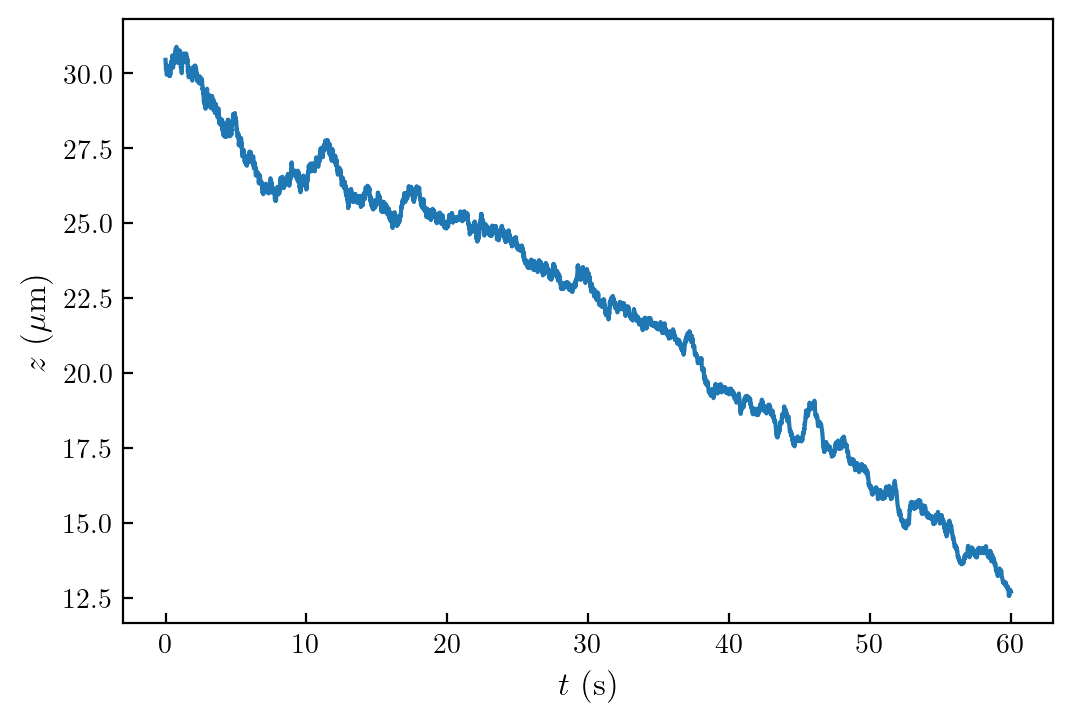

In [5]:
figsize=( cm2inch(16),cm2inch(8))

plt.plot(time, z)
plt.xlabel("$t$ (s)")
plt.ylabel("$z$ ($\\mu$m)")
plt.savefig("traj_sedimenting.pdf")

In [6]:
popt, pcov = curve_fit(traj_sedim, time, z)

Text(0, 0.5, '$z$ ($\\mu$m)')

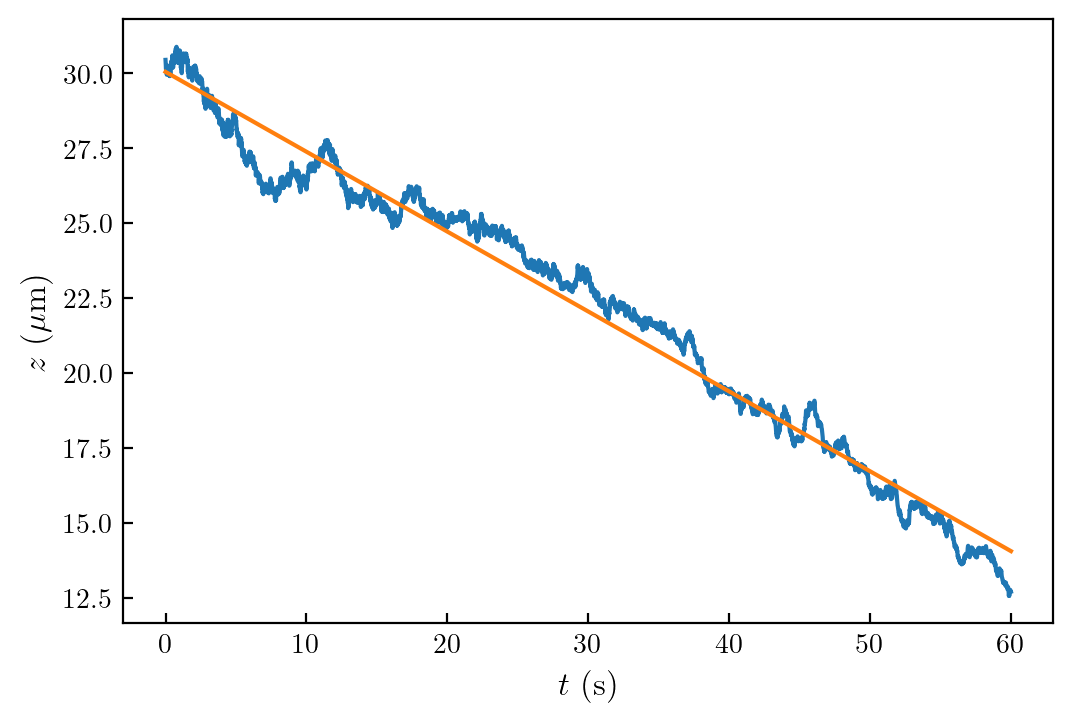

In [7]:
plt.plot(time, z)
plt.plot(time, traj_sedim(time, *popt))
plt.xlabel("$t$ (s)")
plt.ylabel("$z$ ($\\mu$m)")

In [8]:
popt

array([-0.26669228, 30.0528722 ])

The sedimentation drift velocity for a spherical particle in bulk writes:

\begin{equation}
v_\mathrm{sed} = \frac{2}{9} \frac{\Delta \rho a^2 g}{\eta}
\end{equation}

In [9]:
a = 1.45e-6
v_th = 2/9 * 50 * a ** 2 * 9.81 / 0.001 * 1e6

In [10]:
v_th

0.22917250000000006

In [11]:
def msd(x, Dt):
	"""Function that returns the MSD for a list of time indices Dt for a trajectory x"""
	_msd = lambda x, Dt: np.mean((x[:-Dt] - x[Dt:]) ** 2)
	return [_msd(x, i) for i in Dt]

In [12]:
Dt = np.arange(1,1000,5)

In [13]:
MSD = msd(z, Dt)


In [60]:
def msd_th(x, d, v, n):
    return 2*d*x + v**2 * x**2 + n**2

def msd_log(x, d, v, n):
    return np.log( 2*d*x + v**2 * x**2 + n**2)

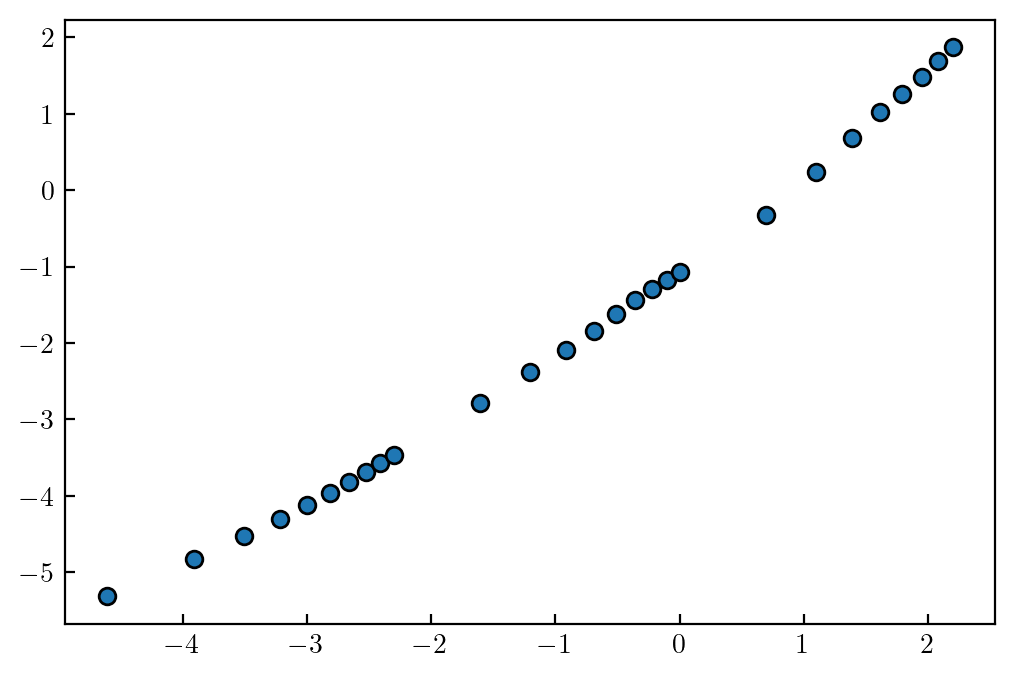

In [61]:
plt.plot(np.log(Dt/100),np.log(MSD), "o")

In [72]:
popt, pcov = curve_fit(msd_log, Dt/100, np.log(MSD), p0 = [0.13, 0.22, 4e-2], maxfev=2000, ftol=1e-2)

In [73]:
popt

array([0.143778  , 0.22178209, 0.04504999])

In [74]:
perr = np.sqrt(np.diag(pcov))

In [75]:
perr

array([0.00123833, 0.00238651, 0.00118307])

In [76]:
Dt = np.array([*np.arange(1,10,1), *np.arange(10,100,10), *np.arange(100,1000,100)])
MSD = msd(z, Dt)


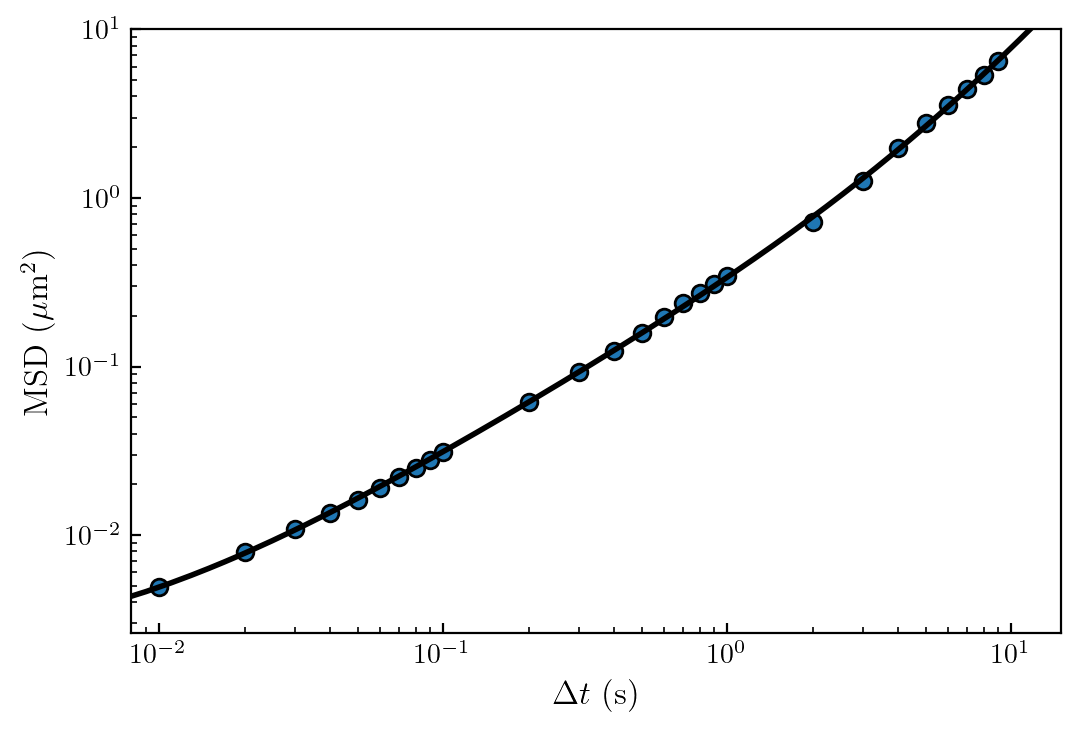

In [77]:
figsize=( cm2inch(16),cm2inch(8))
plt.loglog(Dt/100,MSD, "o")
t_th=np.linspace(0.7e-2, 20,10000)
plt.plot(t_th, msd_th(t_th, *popt), color = "k", linewidth=2)
plt.xlim((0.8e-2, 15))
plt.ylim((None, 10))
plt.xlabel("$\Delta t$ (s)")
plt.ylabel("MSD ($\mathrm{\mu m^2}$)")
plt.savefig("msd_sedimentation.pdf")

In [94]:
relat_err_D = abs(0.144 - 0.146)/0.146
relat_err_D*100

1.3698630136986314

In [86]:
relat_err_v = abs(222 - 229)/229
relat_err_v*100

3.056768558951965

In [80]:
popt[1]

0.2217820942226398

In [84]:
popt[0]

0.14377799719977521

In [91]:
9/2 * 222e-9 * 0.001 / (1.45e-6 ** 2) / 9.81 

48.43513074212656

In [93]:
(50 - 48.5) / 50 * 100

3.0